# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

In [ ]:
!pip install nb_black==1.0.5


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [ ]:
udd = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Supervised Learning - Foundation/project_3/used_device_data.csv')

<IPython.core.display.Javascript object>

In [ ]:
udd.shape

(3454, 15)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [260]:
udd.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [ ]:
udd.info()

In [ ]:
udd.describe(include='all').T

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

1. What does the distribution of normalized used device prices look like?








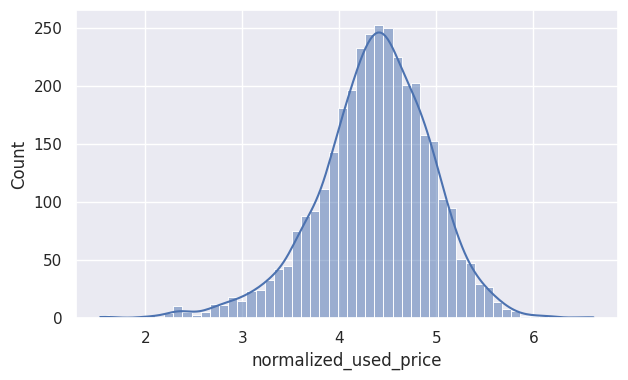

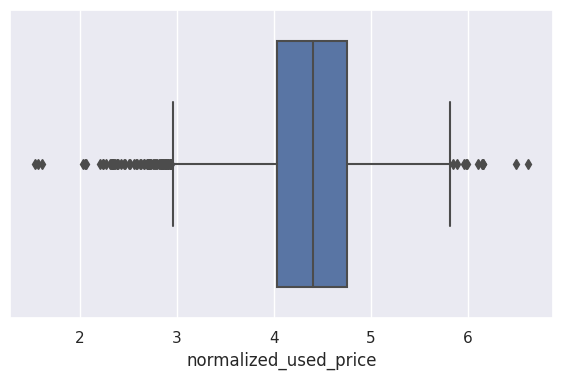

<IPython.core.display.Javascript object>

In [ ]:
# let's plot all the columns to look at their distributions
plt.figure(figsize=(7, 4))
sns.histplot(data=udd, x='normalized_used_price', kde=True)
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(data=udd, x='normalized_used_price')
plt.show()


2. What percentage of the used device market is dominated by Android devices?

In [ ]:
udd['os'].value_counts('Android')


Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

<IPython.core.display.Javascript object>

93 percent of the used device market is dominated by Android devices

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

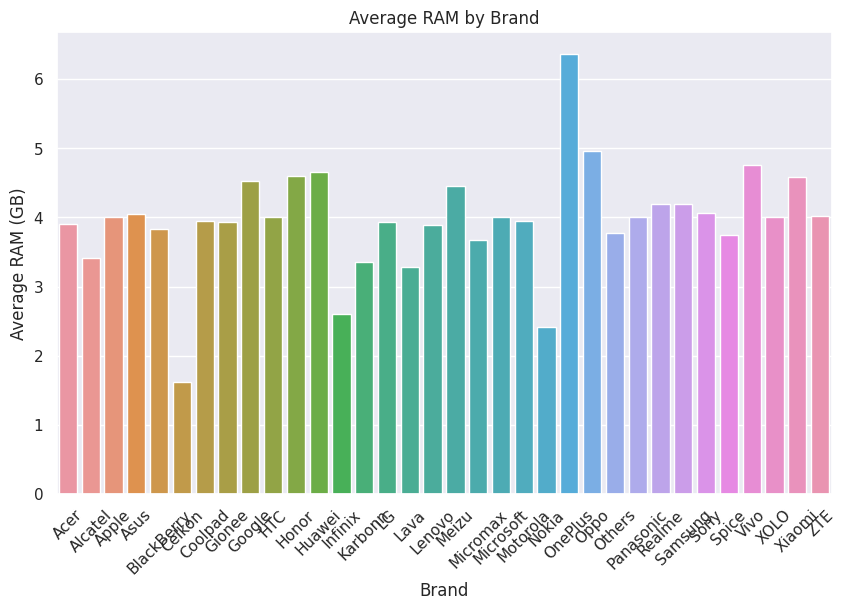

<IPython.core.display.Javascript object>

In [ ]:
brand_avg_ram = udd.groupby('brand_name')['ram'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_avg_ram.index, y=brand_avg_ram.values)
plt.xlabel('Brand')
plt.ylabel('Average RAM (GB)')
plt.title('Average RAM by Brand')
plt.xticks(rotation=45)
plt.show()

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

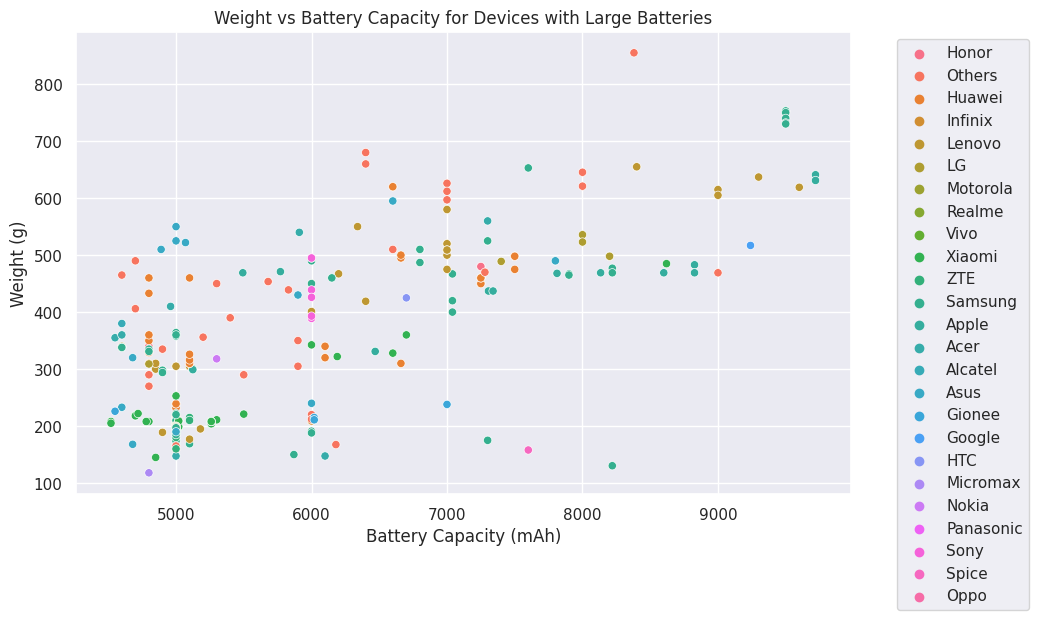

<IPython.core.display.Javascript object>

In [ ]:
large_battery_devices = udd[udd['battery'] > 4500]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=large_battery_devices, x='battery', y='weight', hue='brand_name')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Battery Capacity for Devices with Large Batteries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

3362


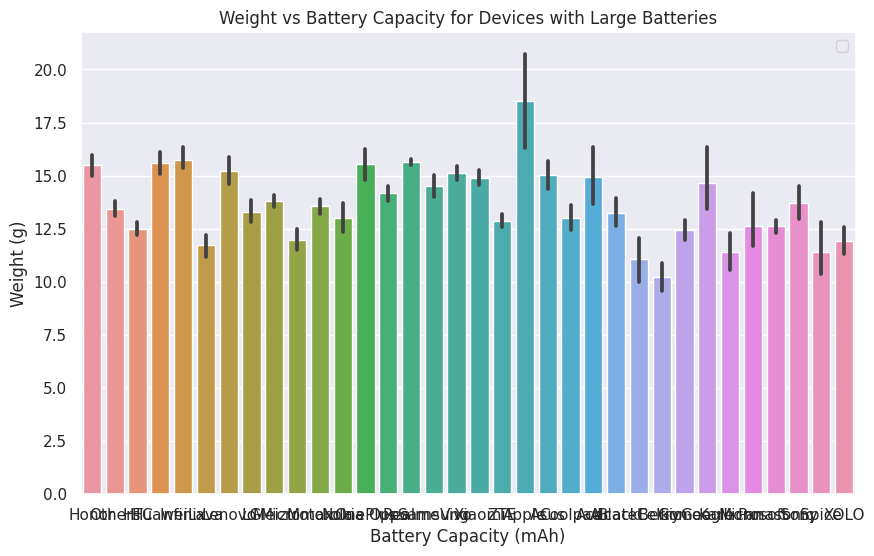

<IPython.core.display.Javascript object>

In [ ]:
large_screen_devices = udd[udd['screen_size'] > 6]
device_counts = large_screen_devices.groupby('brand_name')['screen_size'].count().sum()
print(device_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=large_screen_devices, x='brand_name', y='screen_size')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Battery Capacity for Devices with Large Batteries')
plt.legend()
plt.show()

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

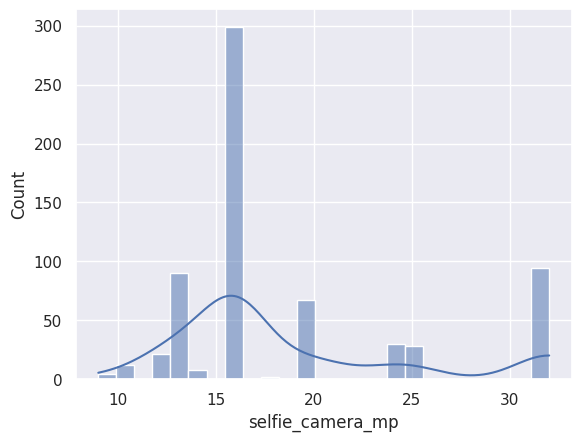

<IPython.core.display.Javascript object>

In [ ]:
selfie_camera = udd[udd['selfie_camera_mp'] > 8]
sns.histplot(data=selfie_camera, x='selfie_camera_mp', kde=True)
plt.show()

7. Which attributes are highly correlated with the normalized price of a used device?

<ipython-input-27-051e4e9c369d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(udd.corr(), annot=True, vmin=-1, vmax=1, cmap="crest", fmt='.1f')


<Axes: >

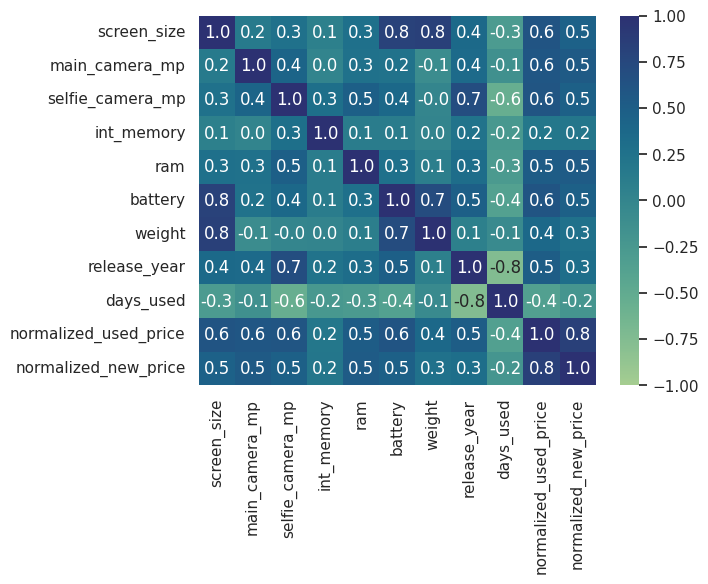

<IPython.core.display.Javascript object>

In [ ]:
sns.heatmap(udd.corr(), annot=True, vmin=-1, vmax=1, cmap="crest", fmt='.1f')

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [188]:
# we first create a copy of the data to avoid changes to it
udd1 = udd.copy()
udd1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [ ]:
# Converting object data types to category
category_col = udd1.select_dtypes(exclude=np.number).columns.tolist()
udd1[category_col] = udd1[category_col].astype("category")

In [190]:
udd1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
# Check for duplicates in the DataFrame
duplicates = udd1.duplicated()

# Count the number of duplicates
duplicate_count = duplicates.sum()

# Print the results
print("Duplicate Rows:")
print(duplicates)
print("\nNumber of Duplicate Rows:", duplicate_count)

In [ ]:
# Check for NaN values in the DataFrame
nan_values = udd1.isna()

# Count the number of NaN values in each column
nan_count = nan_values.sum()

# Print the results
print("NaN Values:")
print(nan_values)
print("\nNumber of NaN Values in Each Column:")
print(nan_count)

In [ ]:
# fill missing columns with the column median
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

udd1[col_to_fill] = udd1[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

In [194]:
udd1["main_camera_mp"] = udd1["main_camera_mp"].fillna(
    value=udd1.groupby(["brand_name", "os","4g","5g"])["main_camera_mp"].transform("median")
)
udd1["main_camera_mp"] = udd1["main_camera_mp"].fillna(udd1["main_camera_mp"].median())

udd1["selfie_camera_mp"] = udd1["selfie_camera_mp"].fillna(
    value=udd1.groupby(["brand_name", "os"])["selfie_camera_mp"].transform("median")
)
udd1["int_memory"] = udd1["int_memory"].fillna(
    value=udd1.groupby(["brand_name", "os"])["int_memory"].transform("median")
)
udd1["ram"] = udd1["ram"].fillna(
    value=udd1.groupby(["brand_name", "os"])["ram"].transform("median")
)
udd1["battery"] = udd1["battery"].fillna(
    value=udd1.groupby(["brand_name", "os"])["battery"].transform("median")
)
udd1["weight"] = udd1["weight"].fillna(
    value=udd1.groupby(["brand_name", "os"])["weight"].transform("median")
)
udd1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
udd1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [ ]:
missing_combinations = udd1[udd1["main_camera_mp"].isnull()].drop_duplicates()
print(missing_combinations)

     brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android        17.32  yes  no             NaN   
60      Infinix  Android        15.39  yes  no             NaN   
61      Infinix  Android        15.39  yes  no             NaN   
62      Infinix  Android        15.39  yes  no             NaN   
63      Infinix  Android        15.29  yes  no             NaN   
...         ...      ...          ...  ...  ..             ...   
3409     Realme  Android        15.37  yes  no             NaN   
3410     Realme  Android        15.37  yes  no             NaN   
3411     Realme  Android        15.34  yes  no             NaN   
3448       Asus  Android        16.74  yes  no             NaN   
3449       Asus  Android        15.34  yes  no             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                 8.0        32.0  2.0   6000.0   209.0          2020   
60                 8.0        64.0  4.0   5000.0   185.0   

<IPython.core.display.Javascript object>

In [ ]:
udd1['brand_name'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
udd1["main_camera_mp"] = udd1["main_camera_mp"].fillna(
    value=udd1.median)


<IPython.core.display.Javascript object>

In [ ]:
udd1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

### Outlier Detection

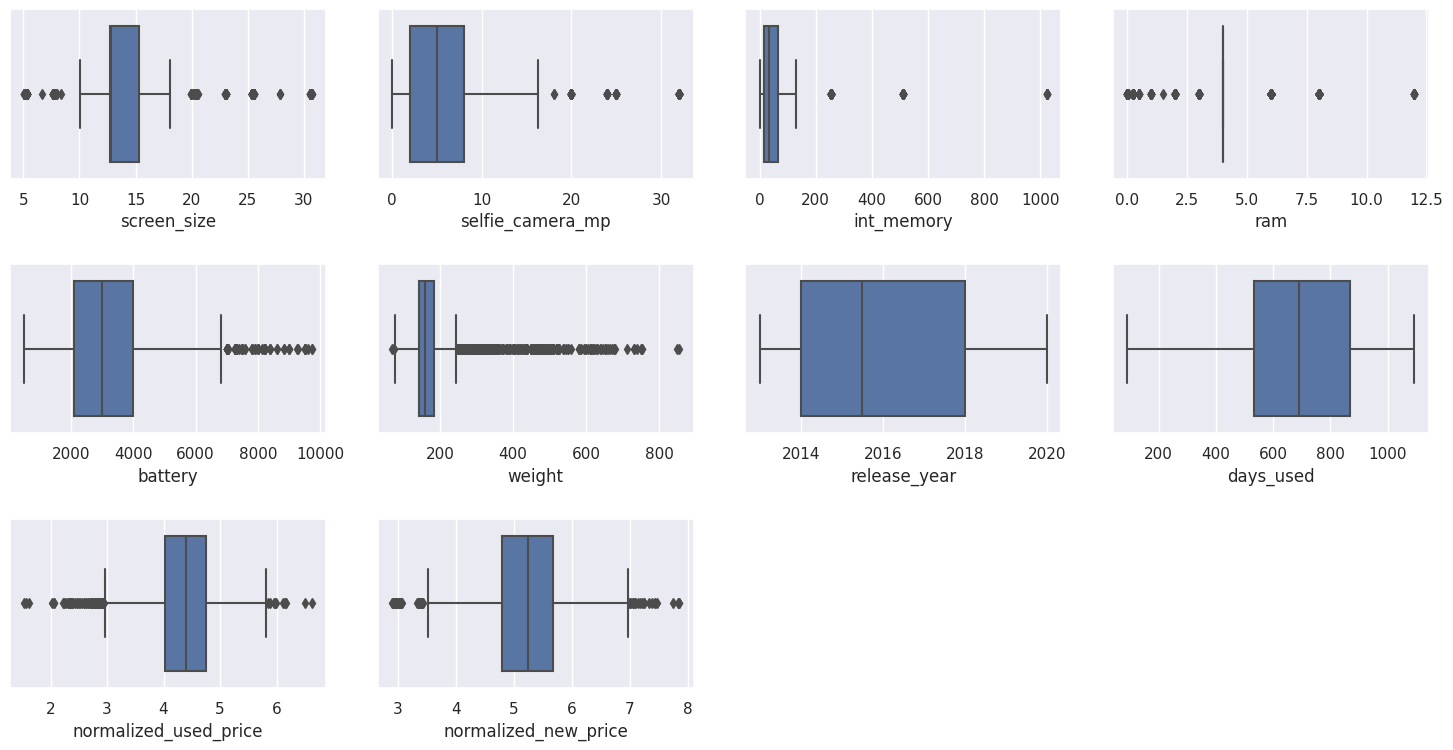

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = udd1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    if udd1[variable].dtype in [np.float64, np.int64]:
        plt.subplot(4, 4, i + 1)
        sns.boxplot(data=udd1, x=variable)
        plt.tight_layout(pad=2)
plt.show()

## EDA

In [196]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=udd1, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [197]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [198]:
# function to create labeled barplots for categorical and numerical variables

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
        
 # show the plot    

<IPython.core.display.Javascript object>

- It is a good idea to explore the data once again after manipulating it.

In [199]:
udd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [200]:
udd1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.569247,4.750694,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.509968,84.943382,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.031471,1.371136,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.114215,1299.430728,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

UNIVARIATE ANALYSIS

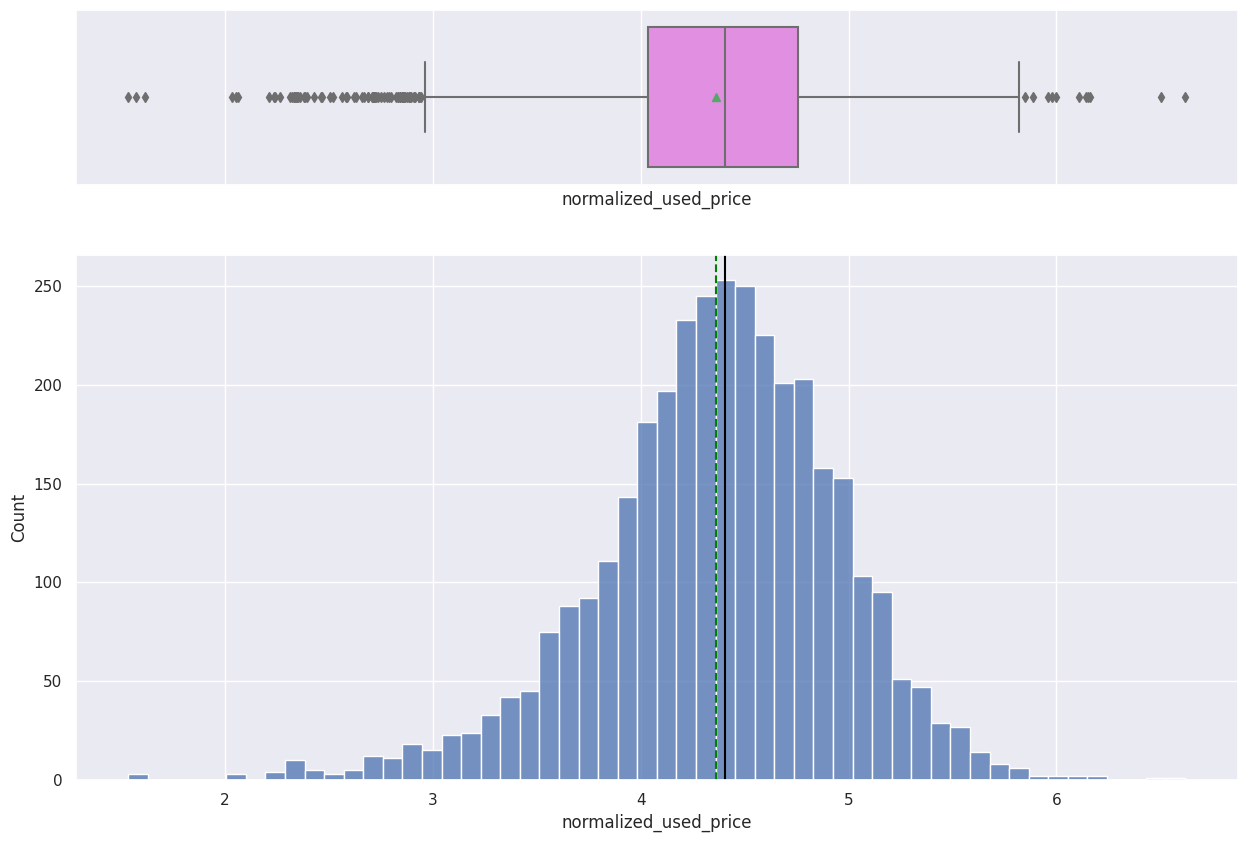

<IPython.core.display.Javascript object>

In [201]:
#Exploring the dependent variable used_price
histogram_boxplot(udd1, "normalized_used_price")

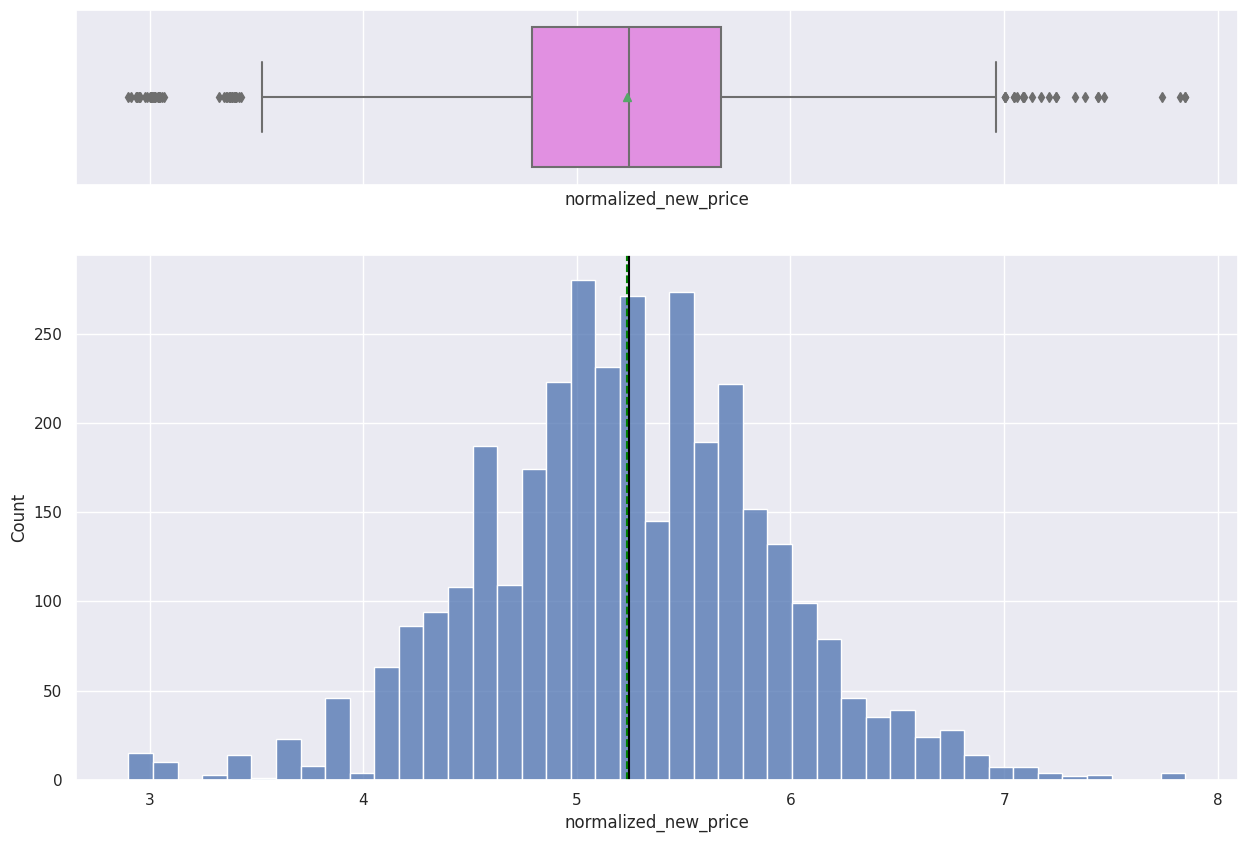

<IPython.core.display.Javascript object>

In [202]:
# Plot histogram and boxplot of new_price
histogram_boxplot(udd1, "normalized_new_price")

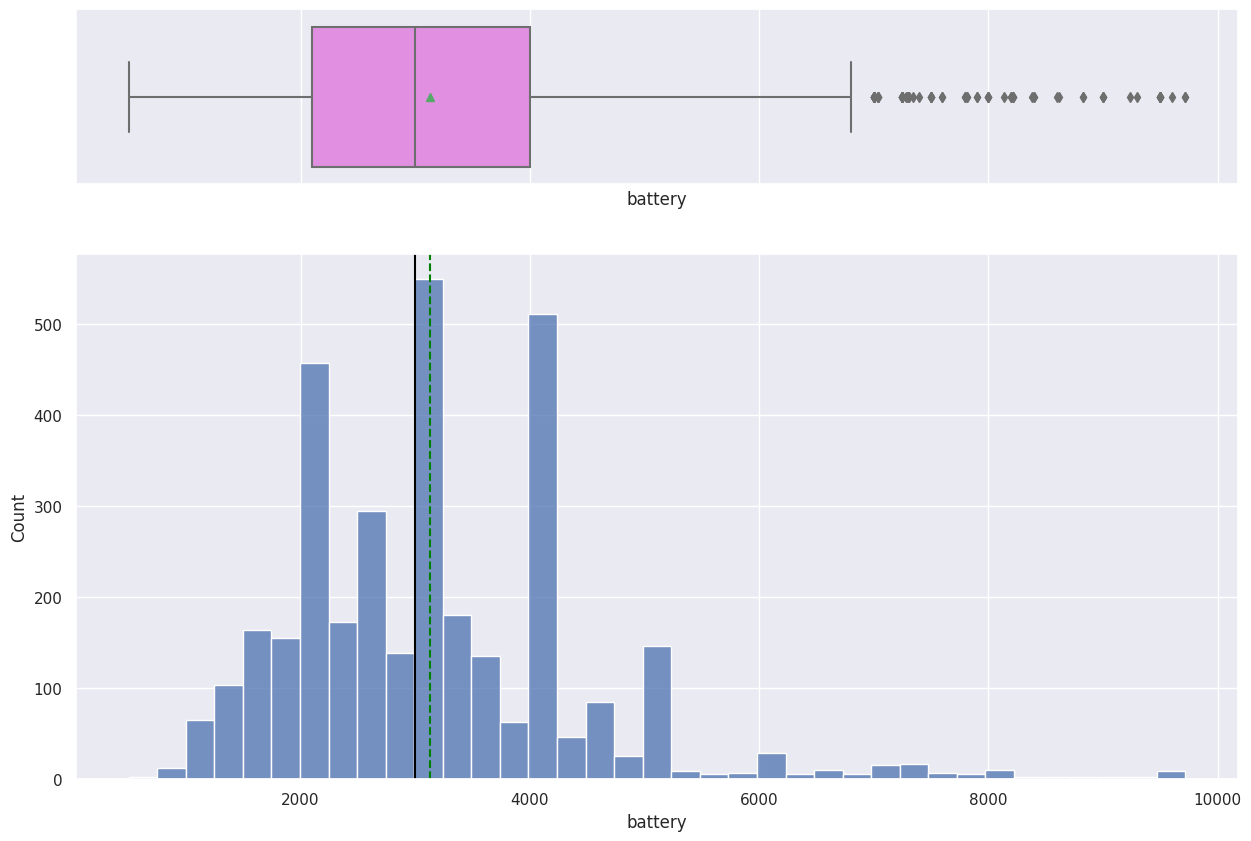

<IPython.core.display.Javascript object>

In [203]:
# Plot histogram and boxplot of battery
histogram_boxplot(udd1, "battery")

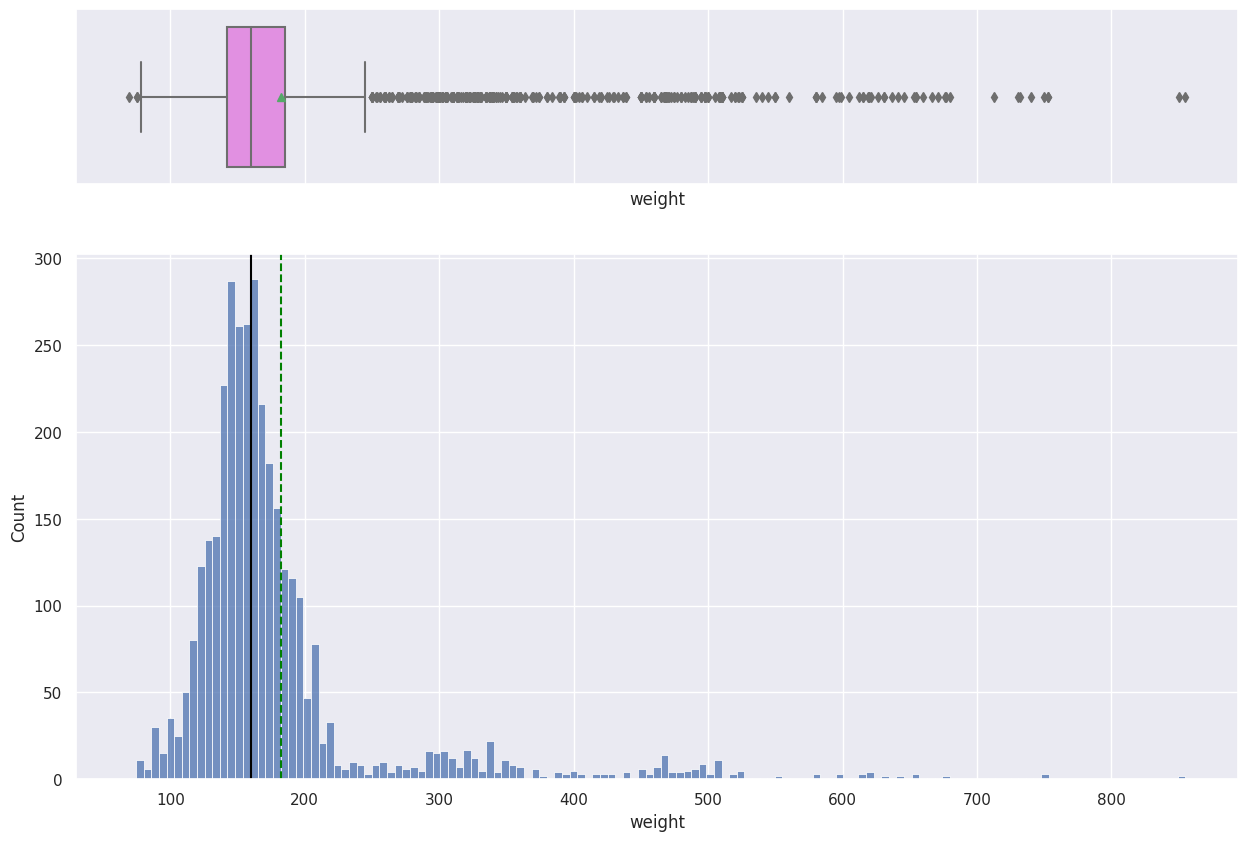

<IPython.core.display.Javascript object>

In [204]:
# Plot histogram and boxplot of weight
histogram_boxplot(udd1, "weight")

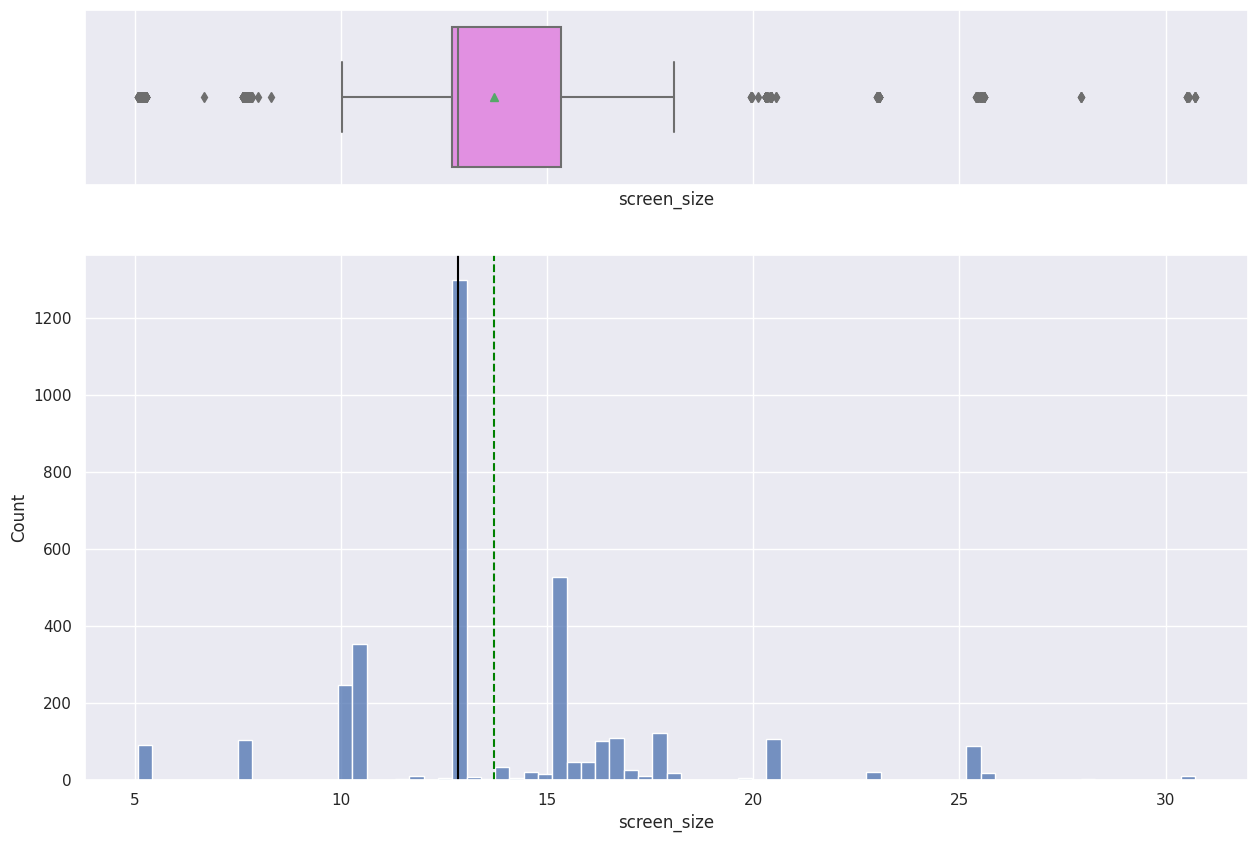

<IPython.core.display.Javascript object>

In [205]:
# Plot histogram and boxplot of screen_size
histogram_boxplot(udd1, "screen_size")

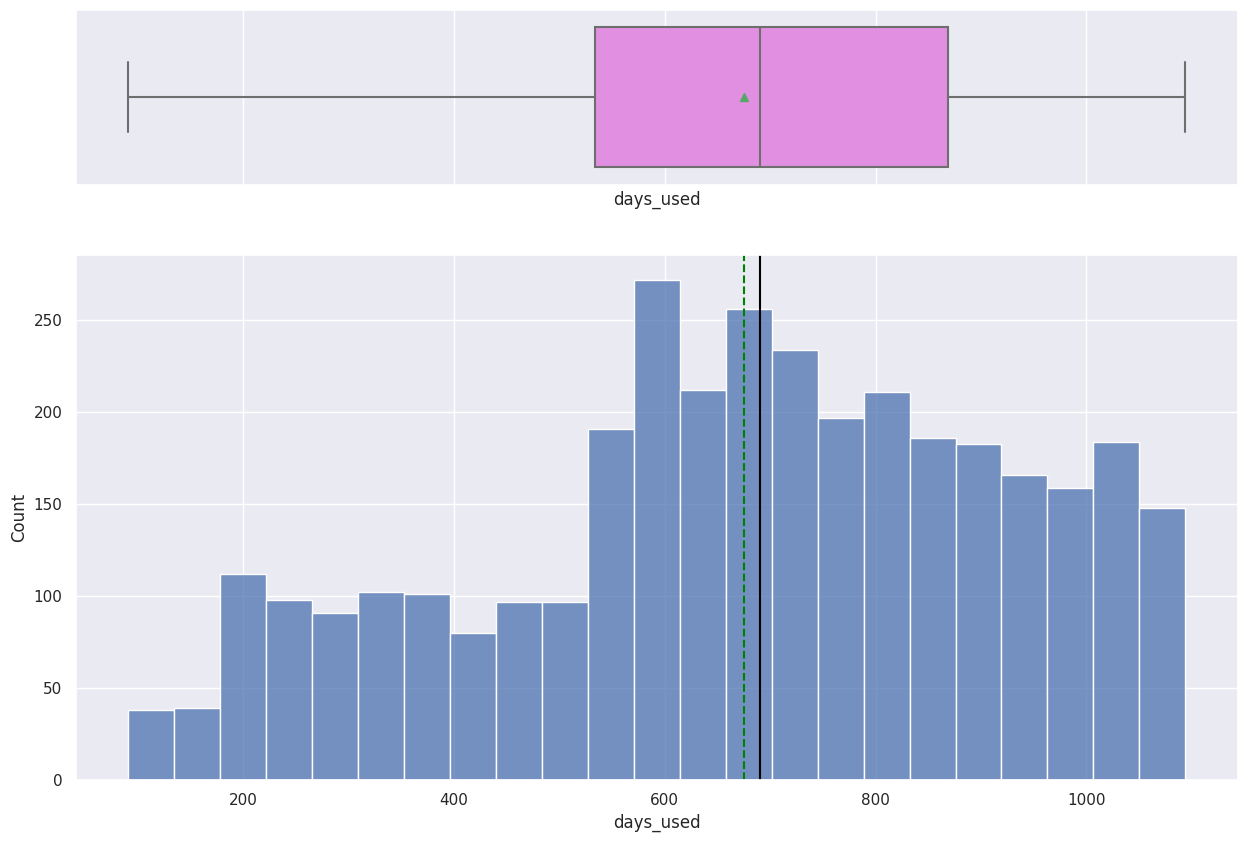

<IPython.core.display.Javascript object>

In [206]:
# Plot histogram and boxplot of days_used
histogram_boxplot(udd1, "days_used")

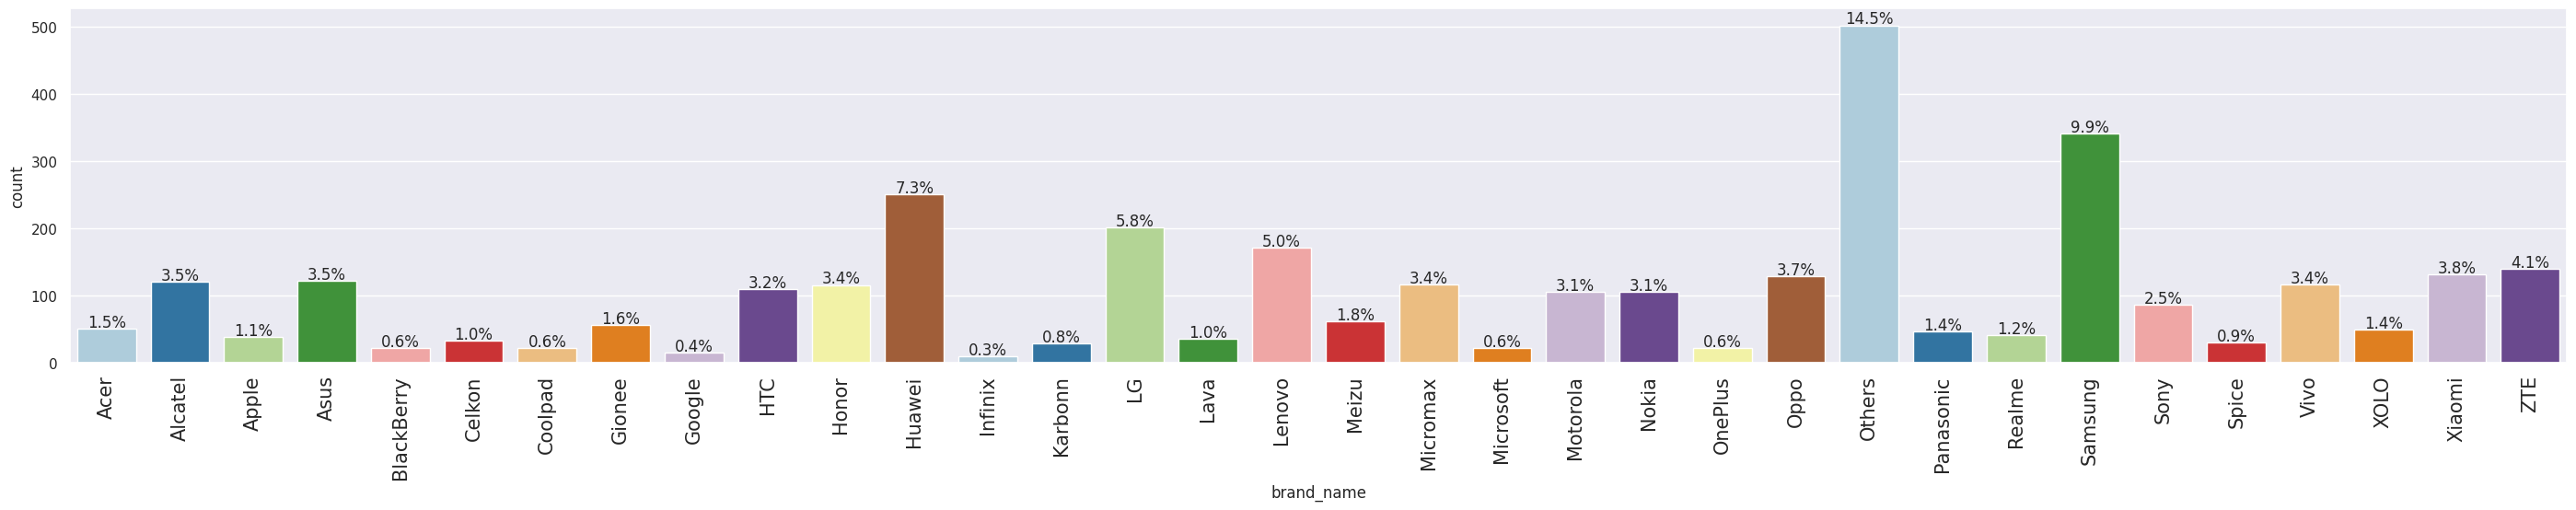

<IPython.core.display.Javascript object>

In [207]:
# Plot barplot of brand_name with percentage showing on each bar
labeled_barplot(udd1, "brand_name", perc=True)

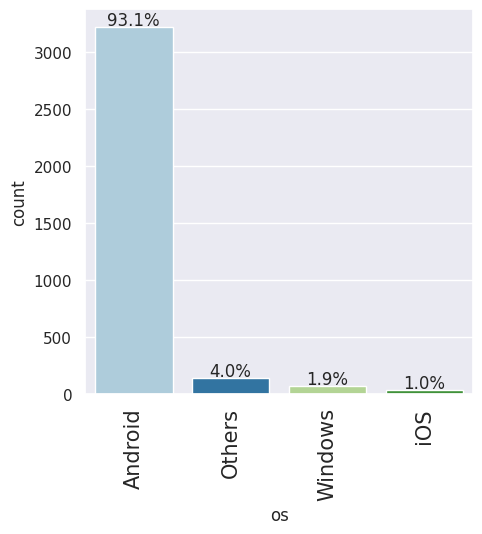

<IPython.core.display.Javascript object>

In [208]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(udd1, "os", perc=True)

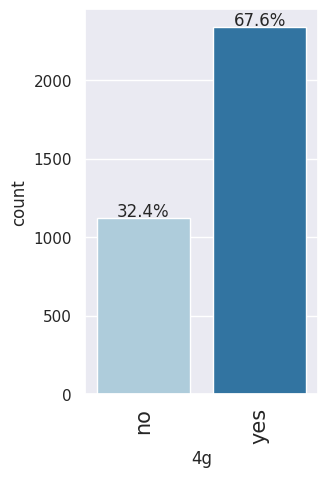

<IPython.core.display.Javascript object>

In [209]:
# Plot barplot of 4g with percentage showing on each bar
labeled_barplot(udd1, "4g", perc=True)

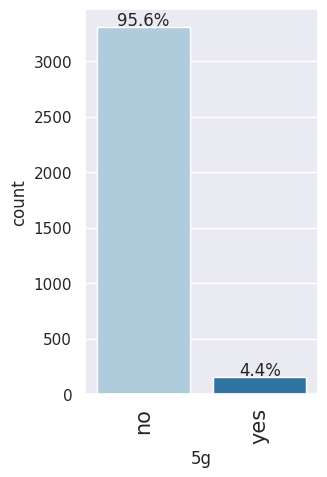

<IPython.core.display.Javascript object>

In [212]:
# Plot barplot of 5g with percentage showing on each bar
labeled_barplot(udd1, "5g", perc=True)


1. What does the distribution of normalized used device prices look like?

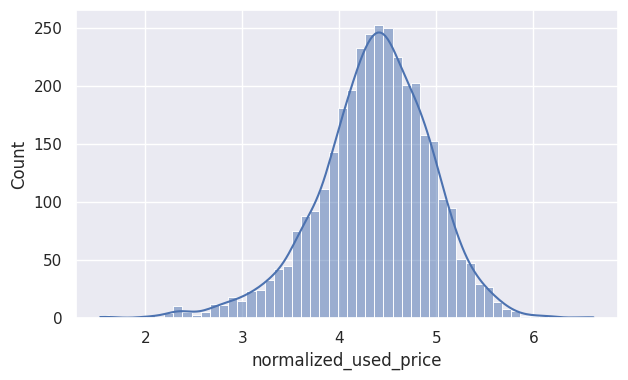

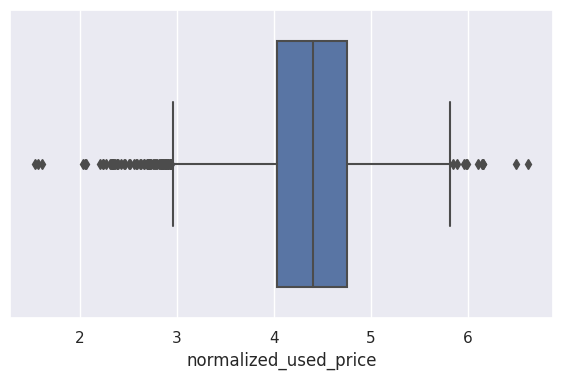

<IPython.core.display.Javascript object>

In [213]:
# let's plot all the columns to look at their distributions
plt.figure(figsize=(7, 4))
sns.histplot(data=udd1, x='normalized_used_price', kde=True)
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(data=udd1, x='normalized_used_price')
plt.show()


2. What percentage of the used device market is dominated by Android devices?

In [214]:
udd1['os'].value_counts('Android')

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

<IPython.core.display.Javascript object>

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?:

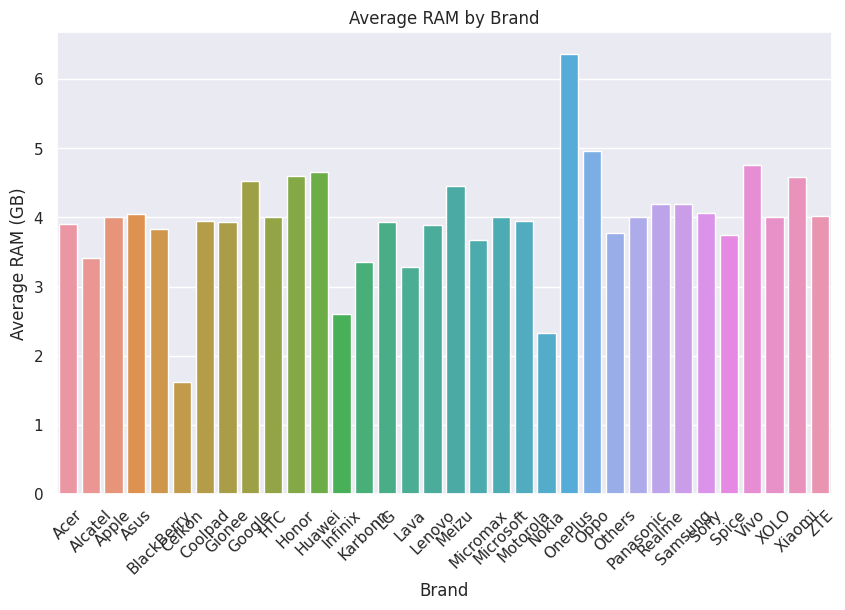

<IPython.core.display.Javascript object>

In [215]:
brand_avg_ram = udd1.groupby('brand_name')['ram'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_avg_ram.index, y=brand_avg_ram.values)
plt.xlabel('Brand')
plt.ylabel('Average RAM (GB)')
plt.title('Average RAM by Brand')
plt.xticks(rotation=45)
plt.show()

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

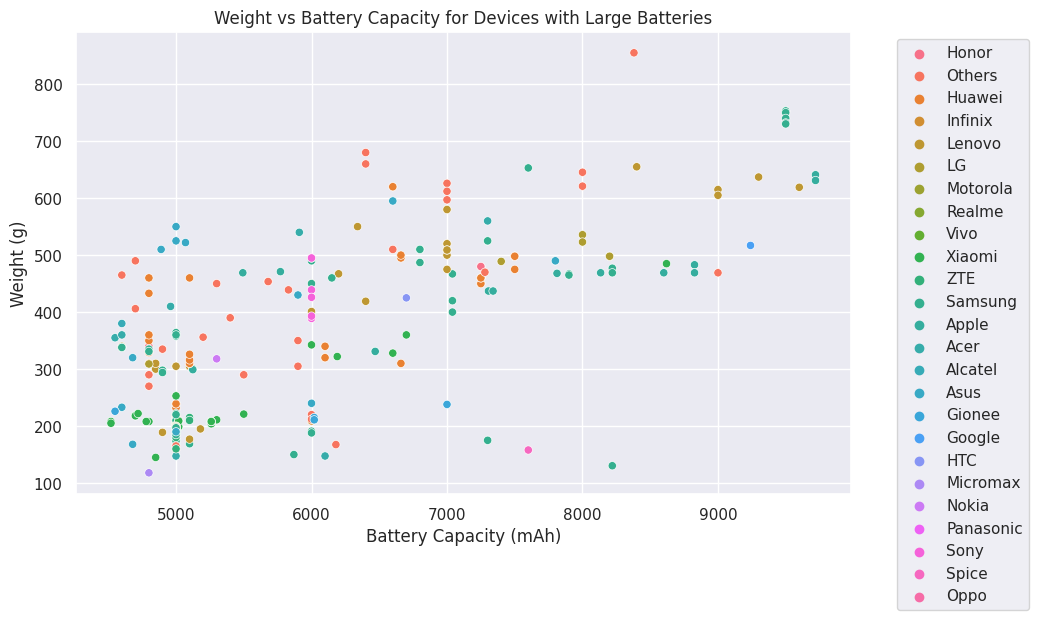

<IPython.core.display.Javascript object>

In [216]:
large_battery_devices = udd1[udd1['battery'] > 4500]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=large_battery_devices, x='battery', y='weight', hue='brand_name')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Battery Capacity for Devices with Large Batteries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

3362


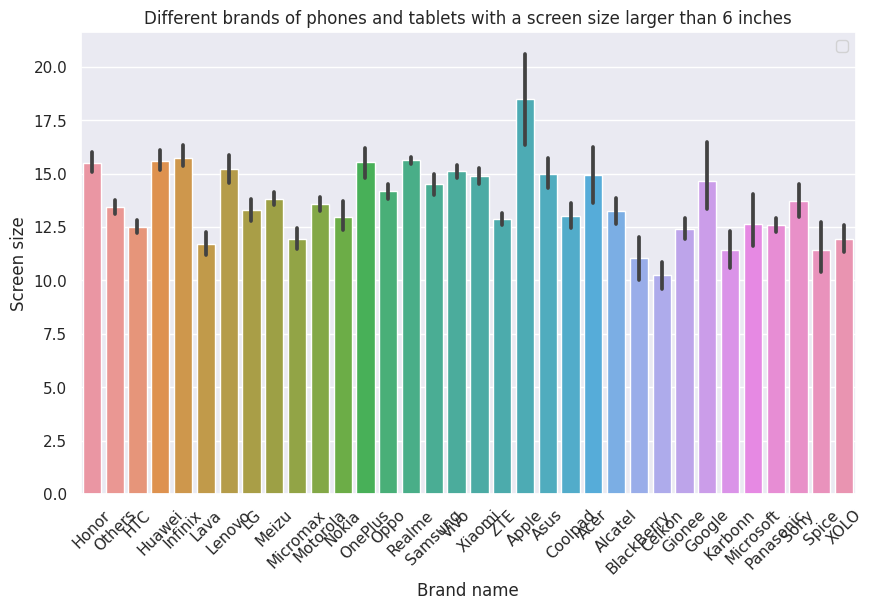

<IPython.core.display.Javascript object>

In [217]:
large_screen_devices = udd1[udd1['screen_size'] > 6]
device_counts = large_screen_devices.groupby('brand_name')['screen_size'].count().sum()
print(device_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=large_screen_devices, x='brand_name', y='screen_size')
plt.xlabel('Brand name')
plt.ylabel('Screen size')
plt.title('Different brands of phones and tablets with a screen size larger than 6 inches')
plt.xticks(rotation=45)
plt.legend()
plt.show()

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
selfie_camera = udd1[udd1['selfie_camera_mp'] > 8]

brands = selfie_camera['brand_name'].unique()

plt.figure(figsize=(10, 6))
sns.histplot(data=udd1[udd1['selfie_camera_mp'] > 8], x='selfie_camera_mp', kde=True, label='brand_name')
plt.xlabel('Selfie Camera (MP)')
plt.ylabel('Count')
plt.title('Distribution of Selfie Camera MP for Devices with MP > 8')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=selfie_camera, x='brand_name', y='selfie_camera_mp')
plt.xlabel('Brand')
plt.ylabel('Selfie Camera (MP)')
plt.title('Boxplot of Selfie Camera MP by Brand')
plt.xticks(rotation=45)
plt.show()

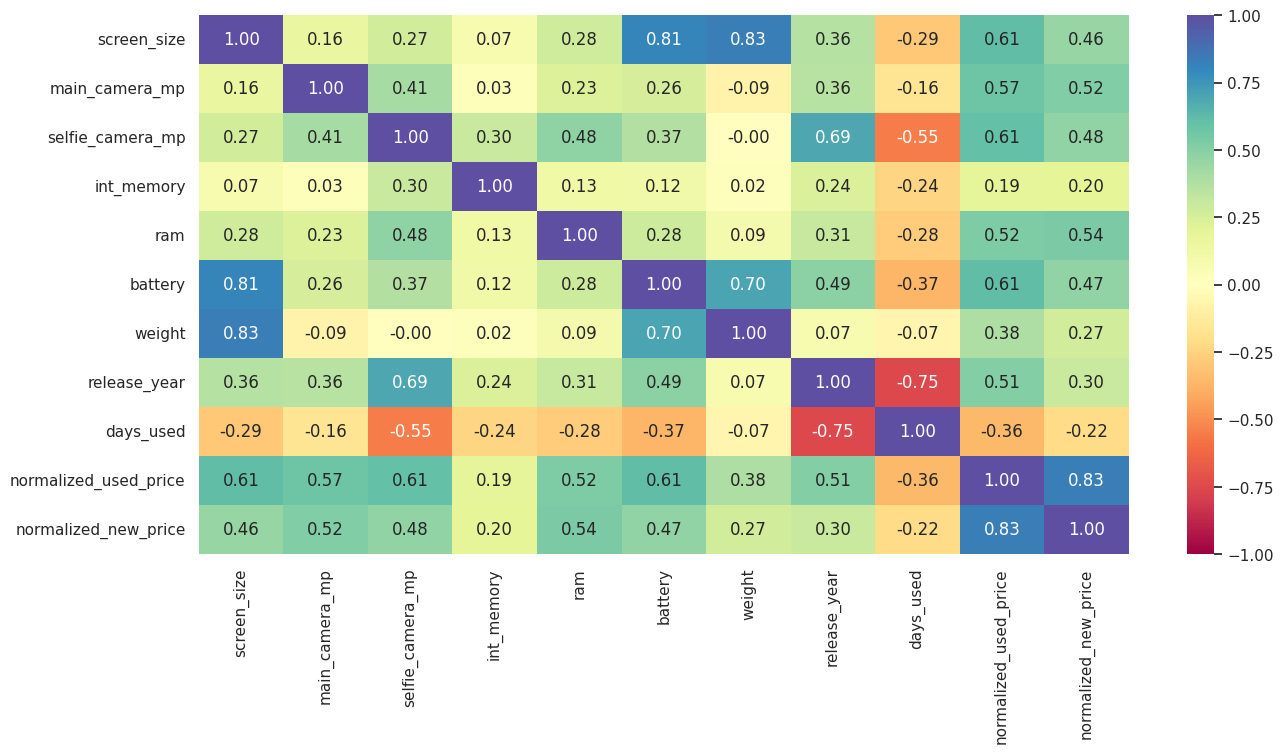

<IPython.core.display.Javascript object>

In [221]:
numeric_columns = udd1.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    udd1[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

Feature engineering

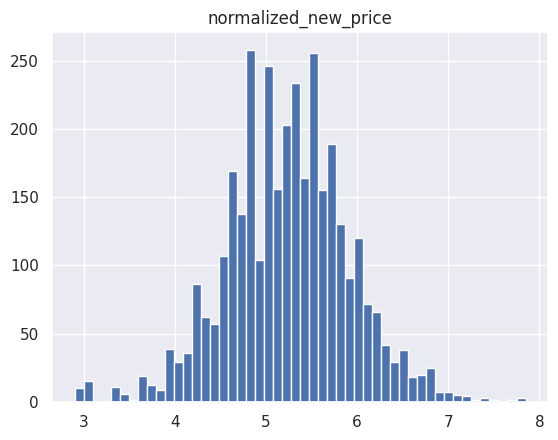

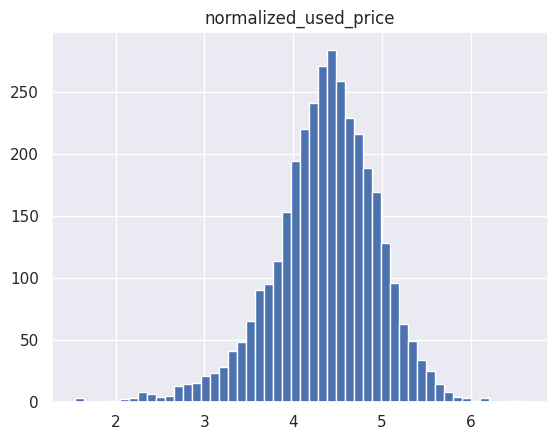

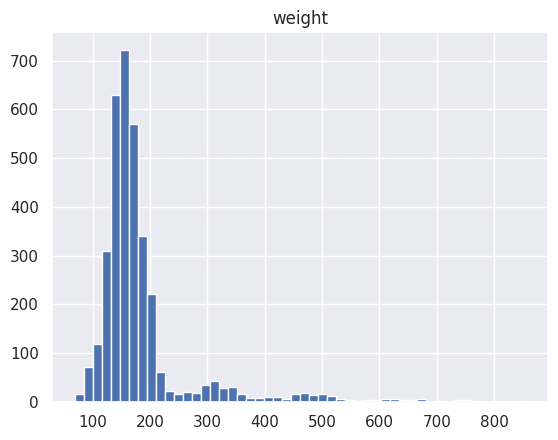

<IPython.core.display.Javascript object>

In [223]:
# Plot of "new_price", "used_price" and "weight" before log transformation
cols_to_log = ["normalized_new_price", "normalized_used_price", "weight"]

for colname in cols_to_log:
    plt.hist(udd1[colname], bins=50)
    plt.title(colname)
    plt.show()

In [224]:
# Log transformation
for colname in cols_to_log:
    udd1[colname + "_log"] = np.log(udd1[colname])

udd1.drop(cols_to_log, axis=1, inplace=True)  # drop previous price columns

<IPython.core.display.Javascript object>

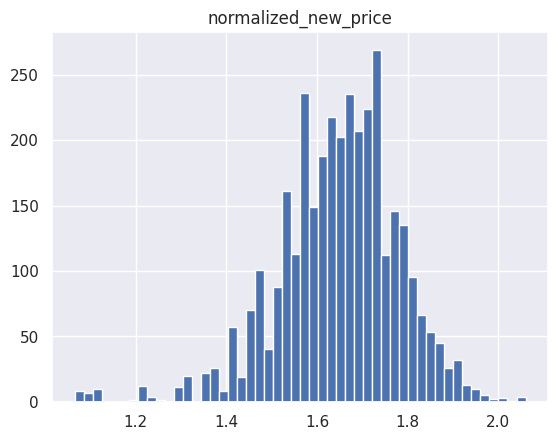

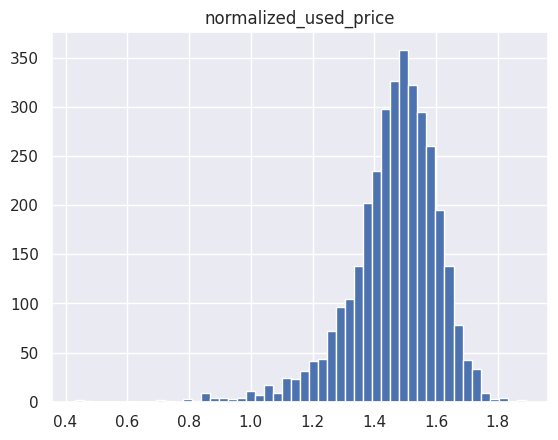

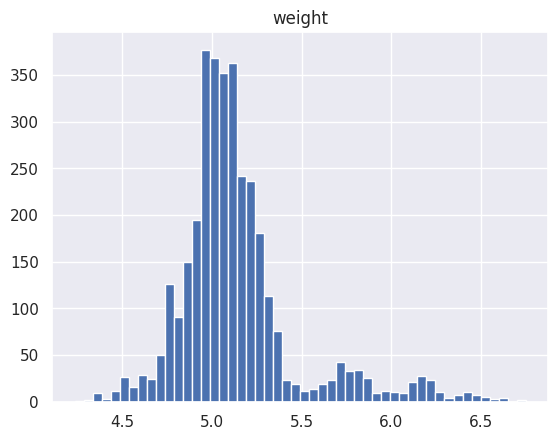

<IPython.core.display.Javascript object>

In [225]:
# Plot of "new_price", "used_price" and "weight" after log transformation
for colname in cols_to_log:
    plt.hist(udd1[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()

In [226]:
# Create dummy variables for the categorical variables
udd1 = pd.get_dummies(udd1, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

<IPython.core.display.Javascript object>

In [227]:
# lets take a look at new dataframe containing the encoded categorical variables
udd1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_new_price_log,normalized_used_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,2020,127,1.550770,1.460375,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,2020,325,1.708200,1.641343,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,2020,162,1.772344,1.631411,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,2020,345,1.728280,1.636155,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,2020,293,1.598951,1.479328,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [229]:
# defining X and y variables
X = udd1.drop(["normalized_used_price_log"], axis=1)
y = udd1["normalized_used_price_log"]

<IPython.core.display.Javascript object>

In [230]:
# view independent variables
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_new_price_log,weight_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,2020,127,1.550770,4.983607,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,2020,325,1.708200,5.361292,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,2020,162,1.772344,5.361292,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,2020,345,1.728280,6.173786,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,2020,293,1.598951,5.220356,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [231]:
# view dependent variables
y.head()

0    1.460375
1    1.641343
2    1.631411
3    1.636155
4    1.479328
Name: normalized_used_price_log, dtype: float64

<IPython.core.display.Javascript object>

In [232]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

<IPython.core.display.Javascript object>

In [233]:
# check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [234]:
linearregression = LinearRegression()  # LinearRegression has been imported above
linearregression.fit(X_train, y_train)  # fit the dependent and independent train data

LinearRegression()

<IPython.core.display.Javascript object>

## Model Performance

In [ ]:
# dataframe to show the model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

In [237]:
# function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [238]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.058638,0.043123,0.839694,0.836444,3.146017


<IPython.core.display.Javascript object>

In [239]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.060227,0.045254,0.82458,0.816057,3.28474


<IPython.core.display.Javascript object>

In [240]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                                OLS Regression Results                               
Dep. Variable:     normalized_used_price_log   R-squared:                       0.840
Model:                                   OLS   Adj. R-squared:                  0.836
Method:                        Least Squares   F-statistic:                     258.4
Date:                       Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                               12:41:04   Log-Likelihood:                 3426.0
No. Observations:                       2417   AIC:                            -6754.
Df Residuals:                           2368   BIC:                            -6470.
Df Model:                                 48                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

Check the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

TEST FOR MULTICOLLINEARITY
Variance Inflation Factor (VIF):

General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity. If VIF is between 5 and 10, we say there is moderate multicollinearity. If VIF is exceeding 10, it shows signs of high multicollinearity.

In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [246]:
checking_vif(X_train1)

,feature,VIF
0,const,3791012.32
1,screen_size,7.69
2,main_camera_mp,2.42
3,selfie_camera_mp,2.87
4,int_memory,1.33
5,ram,2.29
6,battery,4.10
7,release_year,4.82
8,days_used,2.57
9,normalized_new_price_log,3.36


<IPython.core.display.Javascript object>

Removing Multicollinearity
To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [247]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [248]:
col_list = ["RAD", "TAX"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,RAD,0.998348,0.059751
1,TAX,0.998348,0.059751


<IPython.core.display.Javascript object>

In [249]:
col_to_drop = "TAX"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TAX


,feature,VIF
0,screen_size,104.11
1,main_camera_mp,12.28
2,selfie_camera_mp,4.76
3,int_memory,1.90
4,ram,22.37
5,battery,27.45
6,release_year,1205.79
7,days_used,15.22
8,normalized_new_price_log,449.01
9,weight_log,1424.20


<IPython.core.display.Javascript object>

Dropping high p-value variables
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [250]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price_log', 'weight_log', 'brand_name_Celkon', 'brand_name_Infinix', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

In [251]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

<IPython.core.display.Javascript object>

In [252]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                                    OLS Regression Results                                    
Dep. Variable:     normalized_used_price_log   R-squared (uncentered):                   0.998
Model:                                   OLS   Adj. R-squared (uncentered):              0.998
Method:                        Least Squares   F-statistic:                          1.123e+05
Date:                       Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                               12:44:09   Log-Likelihood:                          3386.3
No. Observations:                       2417   AIC:                                     -6747.
Df Residuals:                           2404   BIC:                                     -6671.
Df Model:                                 13                                                  
Covariance Type:                   nonrobust                                                  
                               coef    std err    

<IPython.core.display.Javascript object>

TEST FOR LINEARITY AND INDEPENDENCE
We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
If there is no pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [253]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,1.449733,1.461394,-0.011661
3141,1.429152,1.341328,0.087823
1233,1.415224,1.488924,-0.073699
3046,1.330411,1.351636,-0.021225
2649,1.381765,1.372649,0.009115


<IPython.core.display.Javascript object>

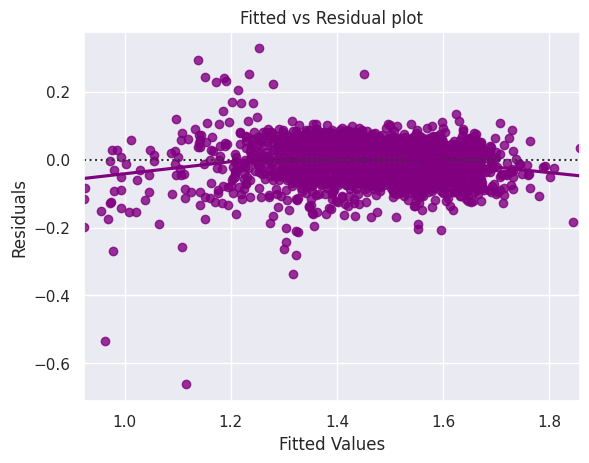

<IPython.core.display.Javascript object>

In [254]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

TEST FOR NORMALITY
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

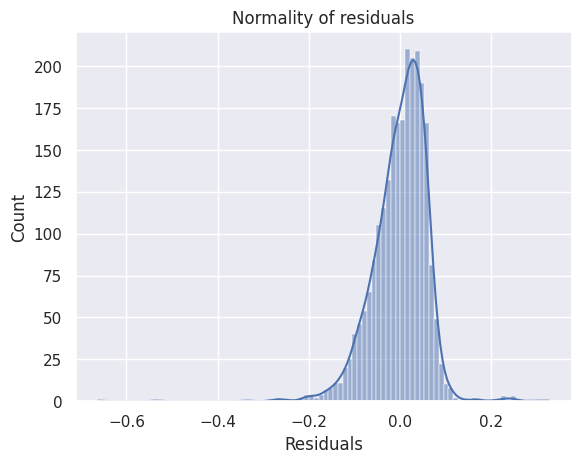

<IPython.core.display.Javascript object>

In [255]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

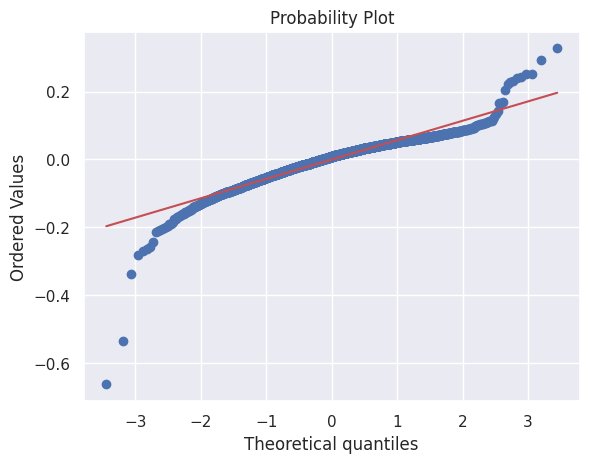

<IPython.core.display.Javascript object>

In [256]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [257]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9147539734840393, pvalue=7.122119381484394e-35)

<IPython.core.display.Javascript object>

TEST FOR HOMOSCEDASTICITY
We will test for homoscedasticity by using the goldfeldquandt test.
If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [258]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 0.8124805645454447), ('p-value', 0.9998321416466479)]

<IPython.core.display.Javascript object>

## Final Model

In [259]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                                    OLS Regression Results                                    
Dep. Variable:     normalized_used_price_log   R-squared (uncentered):                   0.998
Model:                                   OLS   Adj. R-squared (uncentered):              0.998
Method:                        Least Squares   F-statistic:                          1.123e+05
Date:                       Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                               12:45:06   Log-Likelihood:                          3386.3
No. Observations:                       2417   AIC:                                     -6747.
Df Residuals:                           2404   BIC:                                     -6671.
Df Model:                                 13                                                  
Covariance Type:                   nonrobust                                                  
                               coef    std err    

<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 

- 
The used price of newly released phones tends to be higher, which is logical considering that newer phones have higher original prices. Consequently, the used price is influenced, with older phones generally having lower prices. This is because customers often prefer phones that are currently in demand.
- 
Several factors appear to affect the used price, including the release year, 
number of days used, new price, whether the brand is Gionee, and whether the phone supports 4G or 5G. It is understandable that the longer a phone has been used, the more difficult it becomes to determine its original condition, leading to a decrease in its used price. This factor negatively impacts the potential resale value. Additionally, the inclusion of 5G technology in new phones contributes to higher used prices, as it is a relatively new feature.
- 
Interestingly, phones with 4G capability and those from the Gionee brand tend to have lower used prices. This suggests a lack of customer demand for these specific phones, and it might be worth considering discontinuing them in the market.

___